# **MARKETING CAMPAIGN**

Pada Kesempatan kali ini saya akan membuat model Unsupervised Learning

## Bussines Understanding

**Problems**:

sebuah perusahan yang bergerak dibidang penjualan makanan dan minuman mempunyai masalah dalam membuat campaign marketing yang mengakibatkan kerugian yang besar dan target customer yang tidak sesuai.

Jawaban yang di butuhkan oleh perusahaan

1. Berapa Rata-rata income dengan status Education Graduation?
2. Berapa jumlah response yang diberikan oleh Customer dengan kelahiran tahun 1960 sampai 1977?
3. Berapa banyak product yang terjual berdasarkan education?
4. Pada tanggal berapa terjadinya penjualan tertinggi?
5. Tahun kelahiran berapa yang banyak menggunakan Pembelian lewat Website?
6. Berapa total penjualan wines pada tahun 2014?

**Solve The problems**:

Berdasarkan kasus tersebut saya akan membuat clustering untuk menentukan marketing yang tepat untuk sebuah golongan customer tersebut.

## Data Understanding

People

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

Place

* NumWebPurchases: Number of purchases made through the company’s web site
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s web site in the last month


# **IMPORTING LIBRARY**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **DATA LOADING**

In [2]:
data = pd.read_csv('marketing_campaign.csv', delimiter="\t")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Kita akan melakukan duplicate data terlebih dahulu

In [3]:
data_duplicate = data.copy()

Karena saya ingin menampilkan keseluruhan dari data yang saya punya. maka saya akan melakukan set max kolom

In [4]:
pd.set_option('display.max.columns', None)

Kita akan melihat 5 data dari atas

In [5]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


Melihat 5 data dari bawah

In [6]:
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


Melihat dimensional pada data

In [7]:
data.shape

(2240, 29)

Kita mempunyai 2240 baris dan 29 kolom

Selanjutnya kita akan melakukan cek informasi terhadap dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Seperti yang bisa kita lihat bahwa terdapat missing value pada kolom Income, kita akan melakukan handling ini pada bagian handling missing value. Selanjutnya kita akan melakukan cek describe dari data

In [9]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Berdasarkan hasil diatas :
1. Tahun kelahiran rata-rata berada di 1968, sedangkan maximum berada di 1996
2. Rata-Rata income berada di 52247 dolar

# **EXPLORATORY DATA ANALYSIS**

Pada bagian ini kita akan melakukan data analisis menggunakan grouping, query dan Visualisasi. Serta pada bagian ini kita akan menjawab pertanyaan-pertanyaan yang diajukan oleh perusahaan.

**Marital Status**

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

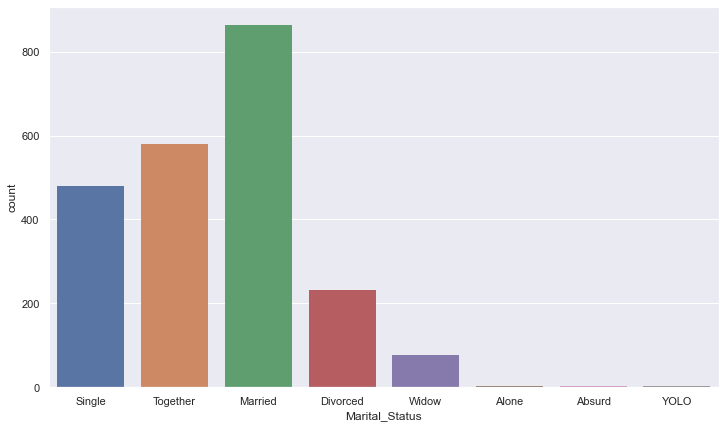

In [10]:
sns.set(rc={'figure.figsize':(12,7)})
sns.countplot(data=data, x='Marital_Status', linewidth=0)

Explanation :

Berdasarkan hasil grafik diatas kita bisa melihat bahwa tertinggi berada di status married dengan total 864 orang, urutan kedua berada di Together dengan total 580 orang, single dengan total 480 penduduk, Divorced dnegan total 232, Widow ada 77 penduduk, Alone ada 3 penduduk, sedangkan Absurd dan YOLO sama mempunyai 2 penduduk.

**1. Berapa Rata-rata income dengan status Education Graduation?**

In [11]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [12]:
gradIncomeMean = data.query("Education == 'Graduation'")[['Education','Income']]
print('Jumlah Customer yang berstatus Graduation :',gradIncomeMean.Education.count(), 'Customer')
print('Rata-rata pendapatan :', gradIncomeMean.Income.mean())

Jumlah Customer yang berstatus Graduation : 1127 Customer
Rata-rata pendapatan : 52720.37365591398


Explanation :

Berdasarkan hasil diatas kita bisa melihat bahwa rata-rata income yang didapat oleh cutomer dengan status Graduation sebanyak 52720 dolar pertahun.

**2. Berapa jumlah response yang diberikan oleh Customer dengan kelahiran tahun 1960 sampai 1977?**

In [13]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


Kita akan melakukan query terlebih dahulu untuk mengambil data customer yang termasuk kelahiran tahun 1960 - 1977

In [14]:
responseByYear = data.query("Year_Birth >= 1960 <=1977")
responseByYear

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0


selanjutnya kita akan melakukan visualisasi untuk melihat berapa banyak response yang diberikan

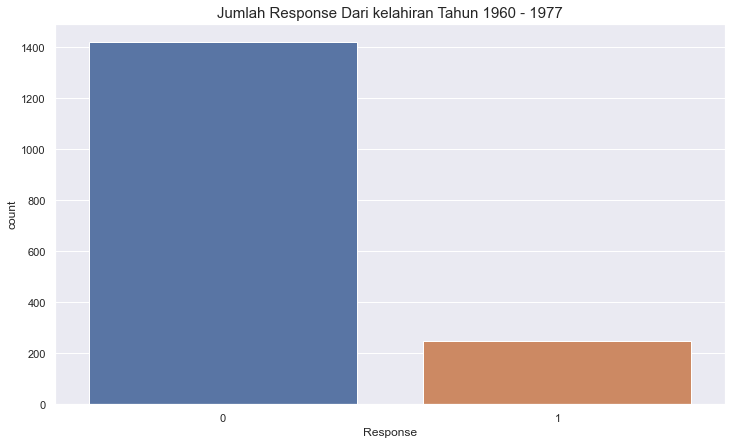

In [15]:
sns.set(rc={'figure.figsize':(12,7)})
sns.countplot(data=responseByYear, x='Response')
plt.title('Jumlah Response Dari kelahiran Tahun 1960 - 1977', fontsize= 15)
plt.show()

In [16]:
responseByYear.Response.value_counts()

0    1421
1     249
Name: Response, dtype: int64

Explanation :

Berdasarkan hasil grafik diatas kita bisa melihat bahwa Customer yang memberikan Response 0 mempunyai total 1421 dan Customer yang memberikan response 1 berjumlah 249 customer.

**3. Berapa banyak product yang terjual berdasarkan education?**

Kita akan melihat berapa banyak produk yang terjual berdasarkan eduaction, sebelumnya saya akan membuat kolom baru yang dimana akan menjumlahkan seluruh produk.

In [17]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


Kita akan membuat data dan kolom baru

In [18]:
# data baru
dataTotalProducts = data[['Education']]

# Menjumlahkan total produk
totalProducts = data.MntWines + data.MntFruits + data.MntMeatProducts + data.MntSweetProducts + data.MntGoldProds

# Kolom baru berisi total produk
dataTotalProducts['totalProducts'] = totalProducts

Melihat data baru dan kolom yang sudah dibuat sebelumnya.

In [19]:
dataTotalProducts

,Education,totalProducts
0,Graduation,1445
1,Graduation,25
2,Graduation,665
3,Graduation,43
4,PhD,376
...,...,...
2235,Graduation,1299
2236,PhD,444
2237,Graduation,1209
2238,Master,763


Kita akan melakukan Grouping untuk melihat hasil dari jumlah produk

In [20]:
dataProducts = dataTotalProducts.groupby('Education')[['Education', 'totalProducts']].sum().reset_index().sort_values('totalProducts', ascending=True)
dataProducts

,Education,totalProducts
1,Basic,3496
0,2n Cycle,91156
3,Master,214482
4,PhD,313801
2,Graduation,649996


Melakukan ploting untuk melihat secara visualisasi

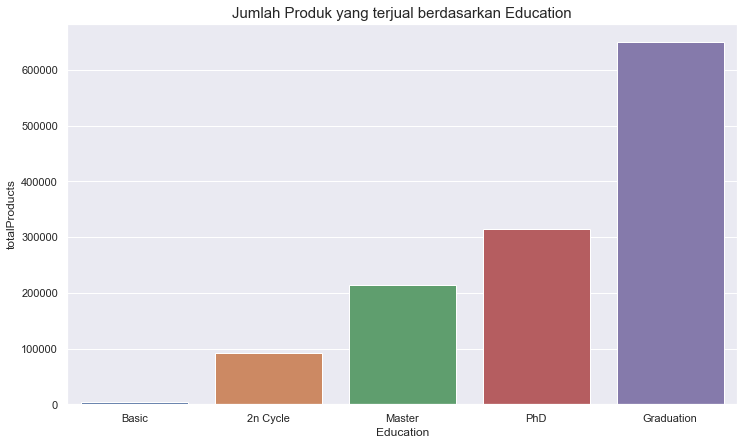

In [21]:
sns.set(rc={'figure.figsize':(12,7)})
sns.barplot(data=dataProducts, x='Education', y='totalProducts', ci=0)
plt.title('Jumlah Produk yang terjual berdasarkan Education', fontsize=15)
plt.show()

Explanation :

Berdasarkan hasil grafik diatas kita bisa melihat pendidikan dengan title `Graduation` lebih sering melakukan pembelian product dengan total 649996 produk, pendidikan dengan title `PhD` melakukan pembelian sebanyak 313801 produk, pendidikan dengan title `Master` melakukan pembelian sebanyak 214482 produk, pendidikan dengan title `2n Cycle` membeli sebanyak 91156 dan yang terakhir adalah title `Basic` melakukan pembelian dengan total 3496 produk.

**4. Pada tahun berapa terjadinya penjualan tertinggi?**

Kita akan melihat rata-rata penjualan tertinggi pada tahun keberapa, selanjutnya kita akan melihat penjualan tertinggi pada bulan di tahun tersebut. Sebelum melakukan analisis kita akan membuat variable dan data baru hanya untuk data tahun serta total produk.

In [22]:
dataYear = data[['Dt_Customer']]
dataYear['Year'] = pd.to_datetime(dataYear['Dt_Customer']).dt.year
dataYear['Day'] = pd.to_datetime(dataYear['Dt_Customer']).dt.day
dataYear['Month'] = pd.to_datetime(dataYear['Dt_Customer']).dt.month
dataYear['totalProducts'] = totalProducts
dataYear

,Dt_Customer,Year,Day,Month,totalProducts
0,04-09-2012,2012,9,4,1445
1,08-03-2014,2014,3,8,25
2,21-08-2013,2013,21,8,665
3,10-02-2014,2014,2,10,43
4,19-01-2014,2014,19,1,376
...,...,...,...,...,...
2235,13-06-2013,2013,13,6,1299
2236,10-06-2014,2014,6,10,444
2237,25-01-2014,2014,25,1,1209
2238,24-01-2014,2014,24,1,763


Melihat unique value dari tahun

In [23]:
dataYear.Year.unique()

array([2012, 2014, 2013], dtype=int64)

Melakukan grouping untuk melihat rata-rata dan jumlah penjualan dari setiap tahun

In [24]:
# Rata-rata produk yang terjual
dataYear.groupby('Year')[['totalProducts']].mean()

,totalProducts
Year,
2012,701.010121
2013,565.190076
2014,457.129264


In [25]:
# Jumlah produk yang terjual
dataYear.groupby('Year')[['totalProducts']].sum()

,totalProducts
Year,
2012,346299
2013,672011
2014,254621


Selanjutnya kita akan melakukan Visualisasi data untuk melihat ke dalam plot

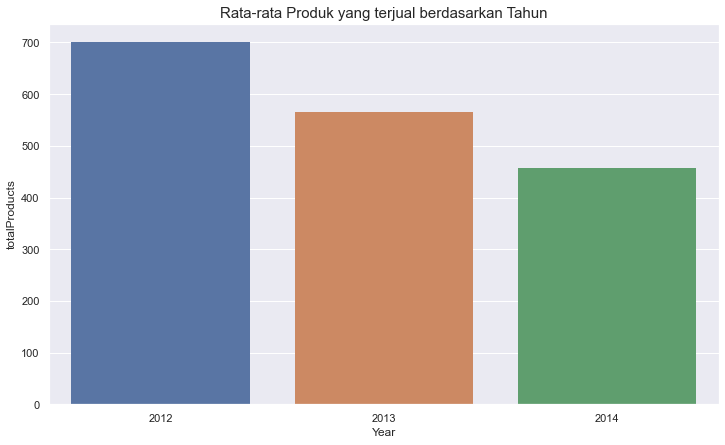

In [26]:
sns.set(rc={'figure.figsize':(12,7)})
sns.barplot(data=dataYear, x='Year', y='totalProducts', ci=0, linewidth=0)
plt.title('Rata-rata Produk yang terjual berdasarkan Tahun', fontsize=15)
plt.show()

Explanation :

Berdasarkan hasil diatas kita bisa melihat bahwa tahun 2012 merupakan paling terbanyak penjualan dibanding tahun 2013 dan 2014.
* Total yang terjual pada tahun 2012 sebanyak 346299 dengan rata-rata penjualan 701 produk
* Total yang terjual pada tahun 2013 sebanyak 672011 dengan rata-rata penjualan 565 produk
* Total yang terjual pada tahun 2014 sebanyak 254621 dengan rata-rata penjualan 457 produk


Selanjutnya kita akan melihat pada bulan apa yang mengalami kenaikan, sebelumnya kita akan melakukan query terhadap data Year untuk mengambil hanya data yang ada di tahun 2012.

In [27]:
# Melakukan Query untuk data 2012 
dataYear2012 = dataYear.query("Year == 2012")[['Month', 'totalProducts']]
dataYear2012.Month.unique()

array([ 4, 11, 10, 12,  8,  3,  9,  7,  5,  2,  6,  1], dtype=int64)

Selanjutnya kita akan menghitung jumlah produk yang terjual setiap bulan.

In [28]:
# Melakukan Grouping untuk melihat jumlah produk
year2012 = dataYear2012.groupby('Month')[['totalProducts']].sum().reset_index()
year2012

,Month,totalProducts
0,1,13683
1,2,6361
2,3,10181
3,4,10027
4,5,12767
5,6,7382
6,7,14428
7,8,60681
8,9,59525
9,10,52314


Kita akan menghitung rata-rata penjualan setiap bulan pada tahun 2012

In [29]:
# Rata-rata penjualan di setiap bulan
dataYear2012.groupby('Month')[['totalProducts']].mean()

,totalProducts
Month,
1,855.187500
2,706.777778
3,484.809524
4,589.823529
5,751.000000
6,527.285714
7,627.304348
8,666.824176
9,888.432836


Kita akan melakukan visualisasi

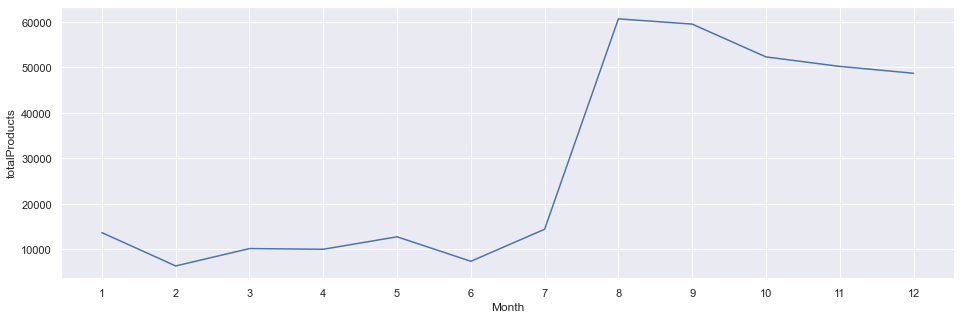

In [30]:
monthRange = range(1,13)
sns.set(rc={'figure.figsize':(16,5)})
sns.lineplot(data=year2012, x='Month', y='totalProducts')
plt.xticks(monthRange)
plt.show()

Exlpanation :

Berdasarkan hasil grafik diatas, kita dapat mengetahui bahwa toko mengalami kenaikan penjualan pada bulan 8 sempat stabil sampai bulan 9 dan mengalami penurunan penjualan saat masuk kebulan 10.

* Total yang terjual pada bulan 7 sebanyak 14428 dengan rata-rata penjualan 627 produk
* Total yang terjual pada bulan 8 sebanyak 60681 dengan rata-rata penjualan 666 produk
* Total yang terjual pada bulan 9 sebanyak 59525 dengan rata-rata penjualan 888 produk
* Total yang terjual pada bulan 9 sebanyak 52314 dengan rata-rata penjualan 645 produk

**5. Tahun kelahiran berapa yang banyak menggunakan Pembelian lewat Website?**

Kita akan melakukan groupig terlebih dahulu untuk melihat berapa banyak yang menggunakan pembelian lewat Website

In [31]:
dataWebPurchases = data.groupby('Year_Birth')[['NumWebPurchases']].sum().reset_index().sort_values('NumWebPurchases', ascending=True)
dataWebPurchases

,Year_Birth,NumWebPurchases
0,1893,1
2,1900,2
3,1940,3
58,1996,4
1,1899,4
4,1941,7
57,1995,14
56,1994,15
55,1993,22
6,1944,40


Setelah melakukan grouping sekarang kita akan melakukan plot

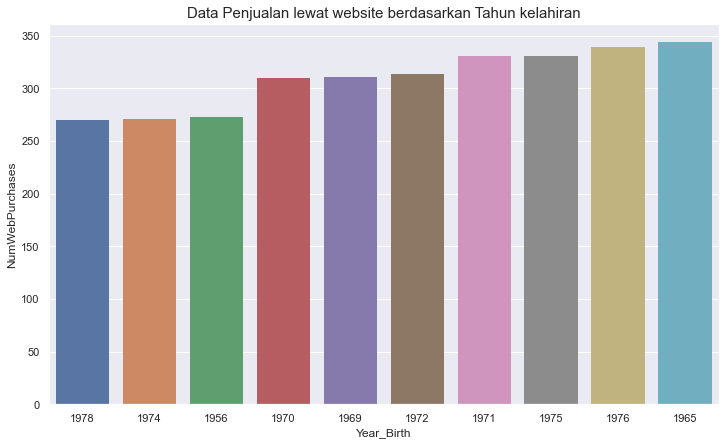

In [32]:
# Mengambil 10 data tertinggi 
dataWebPurchasesTail = dataWebPurchases.tail(10)

sns.set(rc={'figure.figsize':(12,7)})
sns.barplot(data=dataWebPurchasesTail, 
            x='Year_Birth', y='NumWebPurchases', ci=0, linewidth=0, order=dataWebPurchasesTail.sort_values('NumWebPurchases').Year_Birth)
plt.title('Data Penjualan lewat website berdasarkan Tahun kelahiran', fontsize=15)
plt.show()

Explanation :

Berdasarkan hasil diatas kita bisa melihat bahwa tahun kelahiran 1965 lebih banyak menggunakan pemelian lewat website dan disusul oleh tahun kelahiran 1976.

* Tahun kelahiran 1965 mempunyai 344 total pembelian lewat website
* Tahun kelahiran 1976 mempunyai 339 total pembelian lewat website
* Tahun kelahiran 1975 dan 1971 mempunyai nilai yang sama yaitu 331 pembelian lewat website

Serta kita melihat bahwa tadi ada beberapa customer yang lahir tahun 1893, 1900 dan 1899

In [33]:
dataWebPurchases.query("Year_Birth < 1940")

,Year_Birth,NumWebPurchases
0,1893,1
2,1900,2
1,1899,4


Menurut saya tidak 

In [34]:
data.query("Year_Birth < 1940")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0


**6. Berapa total penjualan wines pada tahun 2014?**

Kita akan menghitung total penjualan wines di tahun 2014, setelahnya kita akan melihat pada bulan apa wines terjual sangat banyak.

In [35]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


Membuat variable dan data baru 

In [43]:
wines2104 = data[['Dt_Customer', 'MntWines']]
wines2104['Year'] = pd.to_datetime(dataYear['Dt_Customer']).dt.year
dataWines2014 = wines2104.query("Year == 2014")
dataWines2014

,Dt_Customer,MntWines,Year
1,08-03-2014,11,2014
3,10-02-2014,11,2014
4,19-01-2014,173,2014
9,13-03-2014,28,2014
23,11-01-2014,384,2014
...,...,...,...
2224,09-01-2014,580,2014
2229,18-05-2014,3,2014
2236,10-06-2014,406,2014
2237,25-01-2014,908,2014


Kita telah melakukan Query terhdap data yang dimana hanya kita ambil `MntWines` dan `Year`, selanjutnya kita akan menghitung total wine yang terjual pada tahun 2014.

In [48]:
totalWines2014 = dataWines2014.groupby('Year')[['MntWines']].sum()
totalWines2014

,MntWines
Year,
2014,131670


Selanjutnya kita akan melakukan ploting

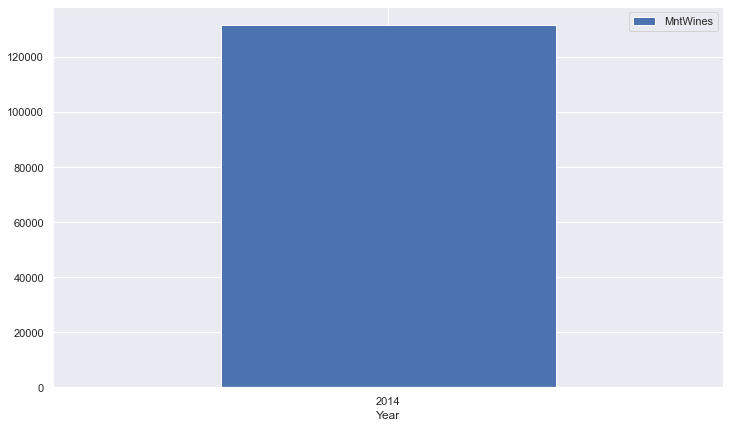

In [49]:
totalWines2014.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

Kita bisa lihat bahwa total penjualan Wine di tahun 2014 mencapai 131670 produk, lalu pada bulan apa penjualan wine tertinggi? Seperti dibilang sebelumnya, saya akan melakukan pencarian pada bulan apa menjadi penjualan wine tertinggi. Kita akan membuat kolom baru untuk mengisi bulan di tahun 2014

In [50]:
wines2104['Month'] = pd.to_datetime(dataYear['Dt_Customer']).dt.month
dataWines2014 = wines2104.query("Year == 2014")
dataWines2014

,Dt_Customer,MntWines,Year,Month
1,08-03-2014,11,2014,8
3,10-02-2014,11,2014,10
4,19-01-2014,173,2014,1
9,13-03-2014,28,2014,3
23,11-01-2014,384,2014,11
...,...,...,...,...
2224,09-01-2014,580,2014,9
2229,18-05-2014,3,2014,5
2236,10-06-2014,406,2014,10
2237,25-01-2014,908,2014,1


Kita akan melihat unique value yang ada di dalam kolom `Month`

In [51]:
dataWines2014.Month.unique()

array([ 8, 10,  1,  3, 11,  5,  6, 12,  7,  4,  2,  9], dtype=int64)

Kita telah melihat bahwa pada data ini terdapat bulan yang komplit mulai dari bulan 1 sampai bulan 12. Selanjutnya kita akan menghitung berapa banyak penjualan wine di setiap bulannya.

In [54]:
# Jumlah Wine yang terjual setiap bulannya

winesSum2014 = dataWines2014.groupby('Month')[['MntWines']].sum().reset_index()
winesSum2014

,Month,MntWines
0,1,20555
1,2,18072
2,3,18588
3,4,11881
4,5,20915
5,6,16171
6,7,6204
7,8,1330
8,9,2610
9,10,4877


In [57]:
# Rata-rata Wine yang terjual setiap bulan

dataWines2014.groupby('Month')[['MntWines']].mean()

,MntWines
Month,
1,260.189873
2,278.030769
3,238.307692
4,167.338028
5,255.060976
6,265.098361
7,258.500000
8,83.125000
9,217.500000


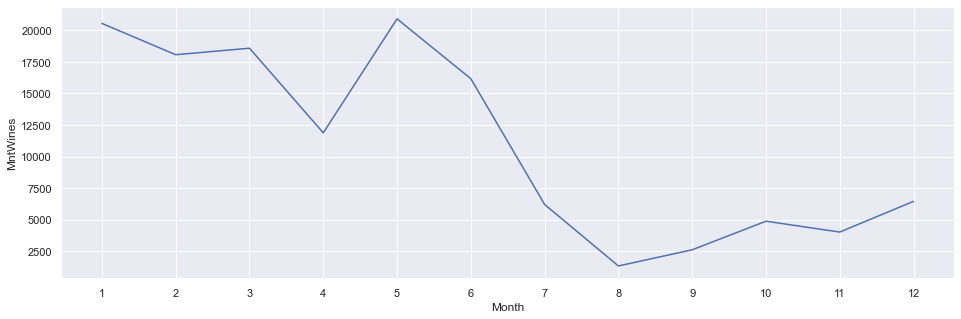

In [56]:
monthRange = range(1,13)
sns.set(rc={'figure.figsize':(16,5)})
sns.lineplot(data=winesSum2014, x='Month', y='MntWines')
plt.xticks(monthRange)
plt.show()

Explanation :

Berdasarkan grafik diatas kita dapat melihat bahwa hanya stabil dari bulan 2 sampai bulan 3

* Produk manakah yang banyak peminatnya selama 3 tahun terakhir

## Korelasi

<AxesSubplot:>

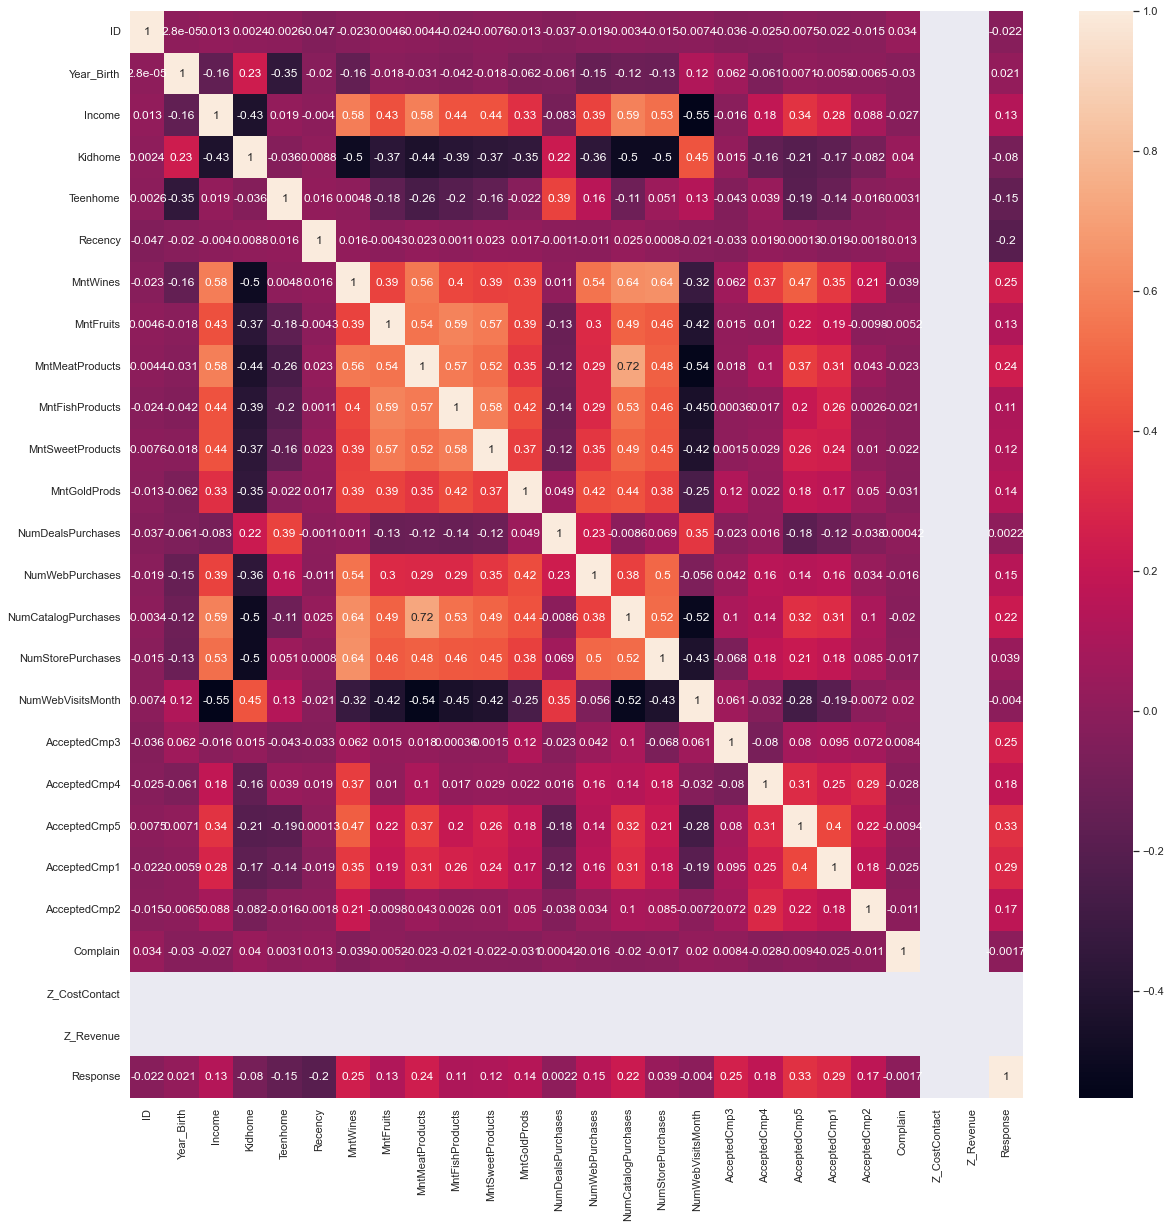

In [61]:
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(data.corr(), annot=True)

# **DATA PREPROCESSING**

Pada bagian ini kita akan melakukan preprocessing data, yang dimana melakukan spliting dataset, handling outlier, handling missing value dan lain-lain.

## Model Inference

Kita akan memisahkan beberapa untuk 